In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [35]:
house_data = pd.read_csv('train.csv') 


In [36]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
house_data.isnull().values.any()

True

In [38]:
check_null = house_data.isnull().sum()
print(check_null)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [39]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [40]:
drop_col = []
for col in house_data.columns:
  if(house_data[col].dtypes == object):
    drop_col.append(col)

drop_col.append("Id")
house_data = house_data.drop(drop_col, axis=1)
print(len(house_data.columns))

37


In [41]:
house_data.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [42]:
LotFrontage_mean_value = house_data['LotFrontage'].mean()
MasVnrArea_mean_value = house_data['MasVnrArea'].mean()
GarageYrBlt_mean_value = house_data['GarageYrBlt'].mean()

house_data['LotFrontage'].fillna(value=LotFrontage_mean_value, inplace=True)
house_data['MasVnrArea'].fillna(value=MasVnrArea_mean_value, inplace=True)
house_data['GarageYrBlt'].fillna(value=GarageYrBlt_mean_value, inplace=True)


In [43]:
house_data.isnull().values.any()

False

In [44]:
x = house_data.drop("SalePrice", axis=1)
y = house_data["SalePrice"]

In [45]:
print(x)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFin

In [46]:
print(y)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [47]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

####Linear Regression model

In [48]:
model = LinearRegression()
model.fit(x_train, y_train)
test_prediction = model.predict(x_test)

####Accuracy testing by MSE, RMSE, MAE.

In [49]:
MS_error =mean_squared_error(y_test, test_prediction)
RMS_error = mean_squared_error(y_test, test_prediction, squared=False)
MA_error = mean_absolute_error(y_test, test_prediction)
print("Mean Squared Error = ",MS_error)
print("Root Mean Squared Error = ",RMS_error)
print("Mean Absolute Error = ", MA_error)

Mean Squared Error =  764315135.2994585
Root Mean Squared Error =  27646.249931943003
Mean Absolute Error =  20660.825932599746


In [50]:
values = range(len(y_test))
print(values)

range(0, 292)


Actual Price = Blue
Predicted Price = Green


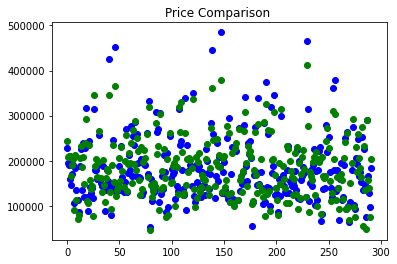

In [51]:
print("Actual Price = Blue")
print("Predicted Price = Green")

plt.scatter(values,y_test, marker='o', c="blue")
plt.scatter(values,test_prediction, marker="o", c="green")
plt.title("Price Comparison ")
plt.show()

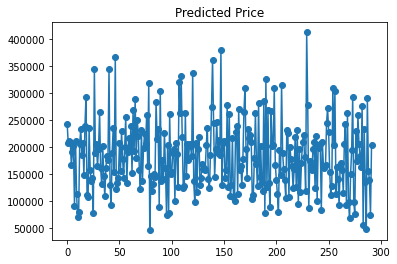

In [52]:
plt.plot(test_prediction, marker='o')
plt.title("Predicted Price")
plt.show()